## Knuth-Morris-Pratt ALgorithm: exact Matching
##### Key idea: find the LPS (for each substring from right, find longest proper prefix that is also a suffix)
##### Cost: O(P+T)

In [10]:
PATTERN = 'ababc'
TEXT = 'ababcabcabababc'

In [11]:
# Create LPS array
lps = [0]*len(PATTERN)
lps

[0, 0, 0, 0, 0]

In [12]:
#index of pattern
pre =0

In [13]:
"""""
PATTERN = 'abacb'
lps = [0]*len(PATTERN)
pre =0
"""""
#Preprocessing pattern
for i in range (1, len(PATTERN)):
    while(pre > 0 and PATTERN[i] != PATTERN[pre]):
        pre = lps[pre-1]
    if(PATTERN[pre] == PATTERN[i]):
        pre +=1
        lps[i]=pre

print(lps)

[0, 0, 1, 2, 0]


In [14]:
#Finding Matching
#p: index pattern t:index text
import datetime
#start_time = datetime.datetime.now()

def compute_LPS(PATTERN):
    pre = 0
    lps = [0]*len(PATTERN)
    for i in range (1, len(PATTERN)):
        while(pre > 0 and PATTERN[i] != PATTERN[pre]):
            pre = lps[pre-1]
        if(PATTERN[pre] == PATTERN[i]):
            pre +=1
            lps[i]=pre
    return lps

def KMP_search(text, pattern):
    p = 0
    sol = []
    lps = compute_LPS(pattern)
    for t in range(len(text)):
        #mismatch AND pointer pattern isn't at start position
        while (p > 0 and pattern[p] != text[t]):
            p = lps[p-1]
        #match
        if pattern[p] == text[t]:
            p +=1
        if p == len(pattern):
            sol.append(t- p +1)
            #print ("I found a match in position {}".format(t - p + 1))
            p = 0
    return sol


def KMP_search2(text, pattern):
    M = len(pattern)
    N = len(text)
    lps = compute_LPS(pattern)
    i = j = 0
    positions = []
    while i < N:
        if pattern[j] == text[i]:
            i += 1
            j += 1

        if j == M:
            positions.append(i - j)
            j = lps[j - 1]

        elif i < N and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return positions
#end_time = datetime.datetime.now()

#time_diff = (end_time - start_time)
#execution_time = time_diff.total_seconds() * 1000

#print(execution_time)

In [15]:
def compute_LPS_array(pattern):
    length = 0
    lps = [0] * len(pattern)
    i = 1
    while i < len(pattern):
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length-1]
            else:
                lps[i] = 0
                i += 1
    return lps
print(compute_LPS_array('abaababaabaababaababa'))

[0, 0, 1, 1, 2, 3, 2, 3, 4, 5, 6, 4, 5, 6, 7, 8, 9, 10, 11, 7, 8]


In [22]:
p = 'ababc'
t = 'ababcababcabababc'
#p = 'aba'
#t = 'abcabcababa'
sol= KMP_search2(t, p)
print(sol)

[0, 5, 12]


In [17]:
import random
import string
import time
import matplotlib.pyplot as plt


# Generating a synthetic dataset
def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

text = generate_random_string(1000)  # Text of 1000 characters
patterns = [generate_random_string(5) for _ in range(10)]  # 10 patterns, each of 5 characters
text = ''.join('a')*1000
patterns.append('aaaaa')
print(len(patterns))

11


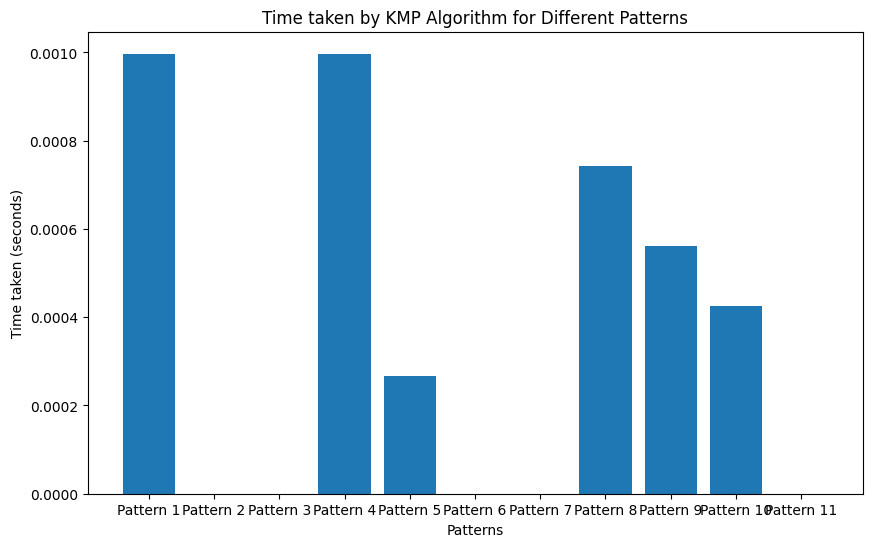

In [18]:
# Testing the algorithm and recording the time taken for each search
times = []
for pattern in patterns:
    start_time = time.time()
    positions = KMP_search(text, pattern)
    end_time = time.time()
    times.append(end_time - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), times, tick_label=[f'Pattern {i+1}' for i in range(11)])
plt.xlabel('Patterns')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by KMP Algorithm for Different Patterns')
plt.show()

## KMT _ from Cormen

In [21]:
def KMT_preproc(p):
    m = len(p)
    lps =[0]*m
    k =0
    for q in range(2, m):
        while k > 0 and p[k+1] != p[q]:
            k = lps[k]
        if p[k+1] == p[q]:
            k += 1
        lps[q] = k
    return lps


def compute_LPS(PATTERN):
    pre = 0
    lps = [0]*len(PATTERN)
    for i in range (1, len(PATTERN)):
        while(pre > 0 and PATTERN[i] != PATTERN[pre]):
            pre = lps[pre-1]
        if(PATTERN[pre] == PATTERN[i]):
            pre +=1
            lps[i]=pre
    return lps

def KMT_matcher (t,p):
    n = len(t)
    m = len(p)
    occurencies =[]
    lps = KMT_preproc(p)
    q =0
    for i in range (1,n):
        while q > 0 and p[q+1] != t[i]:
            q = lps[q]
            if p[q+1] == t[i]:
                q = q+1
                if q ==m:
                    occurencies.append(i-m)
                    q = lps[q]
    return occurencies

def KMP_search(text, pattern):
    M = len(pattern)
    N = len(text)
    lps = compute_LPS(pattern)
    i = j = 0
    positions = []
    while i < N:
        if pattern[j] == text[i]:
            i += 1
            j += 1

        if j == M:
            positions.append(i - j)
            j = lps[j - 1]

        elif i < N and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return positions


p = 'aba'
t = 'ababacaba'


print('LPS of KMT_preproc is {}'.format(KMT_matcher(t,p)))
print('LPS of old meth is {}'.format(KMP_search(t,p)))



LPS of KMT_preproc is []
LPS of old meth is [0, 2, 6]


In [66]:
def KMP_gus(P,T):
    c = 1
    p = 1
    n = len(T)
    m = len(P)
    occ =[]
    lps = compute_LPS(P)
    while c < n:
        while P[p]== T[c] and p <= m:
            p +=1
            c += 1
        if p == n+1:
            occ.append(c-n)
        if p == 1:
            c +=1
        p = lps(p)
    return occ

def KMP_search(text, pattern):
    M = len(pattern)
    N = len(text)
    lps = compute_LPS(pattern)
    i = j = 0
    occurencies = []
    while i < N:
        #Match char
        if pattern[j] == text[i]:
            i += 1
            j += 1

        if j == M:
            occurencies.append(i - j)
            j = lps[j - 1]
        #MISMATCH
        elif i < N and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return occurencies

p = 'aba'
t = 'ababacbaba'


#print('LPS of KMT_gus {}'.format(KMP_gus(p,t)))
print('LPS of old meth is {}'.format(KMP_search(t,p)))


LPS of old meth is [0, 2, 7]


In [59]:
x = [1,2,3]
y=1
print(x[y-1])

1


In [41]:
#z-box naive version
def create_z_box(p):
    i =0
    j=1
    k=1
    m = len(p)
    z_box = [len(p)]+[0]*(m-1)
    for j in range (1,m):
        i =0
        k = j
        while (i < j and k < m):
        #match
            if p[i]== p[k]:
                z_box[j]+=1
                i+=1
                k+=1
            else:
                break
                
    return z_box

Z = create_z_box('aabcaabxaaz')
print(Z[4])
        

3


In [12]:
#z-box z-algo
def create_z_box(p):
    i =0
    j=1
    k=1
    m = len(p)
    z_box = [0]*m
    for j in range (1,m):
        i =0
        k = j
        while (i < j and k < m):
        #match
            if p[i]== p[k]:
                z_box[j]+=1
                i+=1
                k+=1
            else:
                break
                
    return z_box

Z = create_z_box('aabcaabxaaz')
print(Z[4])

1


In [ ]:
def z_array(s):
   # s= aba Z =[3,0,0]
    z = [len(s)] + [0] * (len(s)-1)

    # Initial comparison of s[1:] with prefix
    # ex Find the FIRST Z BOX 
    #s= aaab inizialize of Z[1] --> Z [0,2,0,0]
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    #setting r and l of Z[1] if Z[1]!=0
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    

In [50]:

s ='abaaa'
m = len(s)
z= [m]+[0]*(m-1)
    # Initial comparison of s[1:] with prefix
for i in range(1, len(s)):
    if s[i] == s[i-1]:
        z[1] += 1
    else:
        break
r, l = 0, 0
if z[1] > 0:
    r, l = z[1], 1

print('z vale {} i vale {}'.format(z, i))
print('L vale {} r vale {}'.format(l,r))

z vale [5, 0, 0, 0, 0] i vale 1
L vale 0 r vale 0


In [39]:
s ='aab'  
x = [len(s)] + [0] * (len(s)-1)
print(x)

[3, 0, 0]
